# Neural Network with Keras for Iris Dataset Classification

## Objectives
- To learn to build and train a simple neural network with Keras
- To learn to follow and interpret the progress of training

## Setup
Use the iris dataset for this assignment: [Iris Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data).

## Task
Build a multiclass classifier with Keras that takes the four numerical features of the iris samples as input and outputs the prediction for its species.

## Steps

### 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Load the dataset & Assign column names

In [5]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

# Assign column names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Separate features and target
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

# Encode the target labels to integers
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)

# One-hot encode the integer labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_encoded = onehot_encoder.fit_transform(y_int.reshape(-1, 1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


### 2. Preprocessing the Data
In this step, we will load the Iris dataset, assign column names, shuffle the dataset, separate features and target, encode the target labels, and split the data into training and validation sets.

In [7]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Separate features and target
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

# Encode the target labels to integers
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y)

# One-hot encode the integer labels
onehot_encoder = OneHotEncoder(sparse_output=False)
y_encoded = onehot_encoder.fit_transform(y_int.reshape(-1, 1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



### 3. Building and Compiling the Model
In this step, we will define the architecture of our neural network using Keras. We will create a Sequential model, add Dense layers, and compile the model with an appropriate optimizer, loss function, and evaluation metric.


In [8]:
# Define the model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()


c:\Users\roope\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)


### 4. Training the Model
In this step, we will train the neural network model using the training data. We will also visualize the training process by plotting the training and validation accuracy and loss over the epochs.


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4560 - loss: 0.9016 - val_accuracy: 0.7500 - val_loss: 0.8075
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7363 - loss: 0.7993 - val_accuracy: 0.7500 - val_loss: 0.7145
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6553 - loss: 0.7026 - val_accuracy: 0.7500 - val_loss: 0.5861
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - loss: 0.5964 - val_accuracy: 0.9583 - val_loss: 0.5269
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7565 - loss: 0.5404 - val_accuracy: 1.0000 - val_loss: 0.4800
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9233 - loss: 0.4403 - val_accuracy: 0.9583 - val_loss: 0.4343
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 0.4263 - val_accuracy: 0.9583 - val_loss: 0.4061
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9221 - loss: 0.3860 - val_accuracy: 0.9167 - val_loss

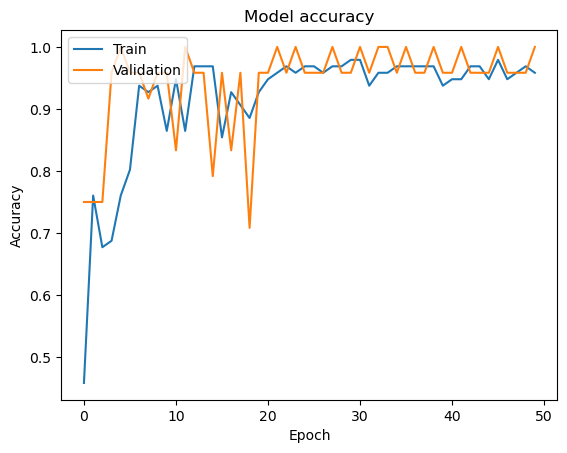

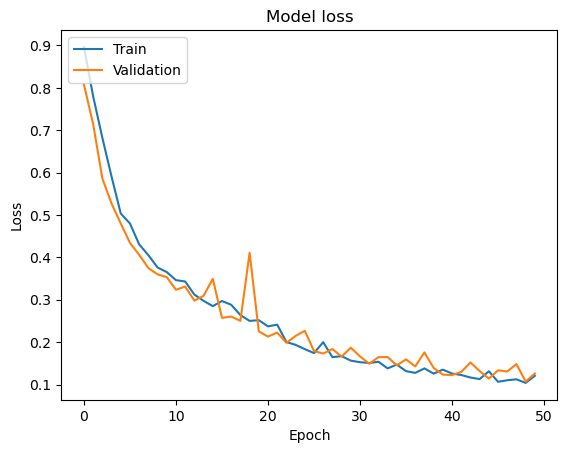

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=5, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### 5. Evaluating the Model
In this step, we will evaluate the trained neural network model using the validation data to determine its performance.

In [10]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')


Validation accuracy: 100.00%


### Conclusion
This notebook provides a full account of the problem treatment, including loading the dataset, preprocessing, building and training the model, and evaluating its performance. Modify the learning rate or other parameters if the model does not achieve the desired accuracy.